# Importing the libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Getting and loading the Training and Validation set

In [2]:
train_path = r"C:\Brain_Tumor_Classification\dataset\train"
validation_path = r"C:\Brain_Tumor_Classification\dataset\val"
test_path = r"C:\Brain_Tumor_Classification\dataset\test"

In [5]:
batch_size = 16
img_size = (256, 256)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40.,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = img_size,
                                                   batch_size = batch_size,
                                                    color_mode = "grayscale",
                                                   class_mode = "categorical")

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                             target_size = img_size,
                                                             batch_size = batch_size,
                                                              color_mode = "grayscale",
                                                             class_mode = "categorical")

test_generator = validation_datagen.flow_from_directory(test_path,
                                                       target_size = img_size,
                                                       batch_size = batch_size,
                                                       color_mode = "grayscale",
                                                       class_mode = "categorical",
                                                       shuffle = False)

Found 2446 images belonging to 4 classes.
Found 815 images belonging to 4 classes.
Found 3 images belonging to 4 classes.


# Getting the class names

In [8]:
temp_classes = dict(train_generator.class_indices)

classes = dict()
for (k, v) in temp_classes.items() :
    classes[v] = k
print(classes)

{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}


# Building the CNN

## Initalising the CNN

In [9]:
model = Sequential()

## Adding the layers

### Adding the First Convolutional and Pooling layers

In [10]:
model.add(Conv2D(32, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Second Convolutional and Pooling Layers

In [11]:
model.add(Conv2D(32, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Third Convolutional and Pooling Layers

In [12]:
model.add(Conv2D(64, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Forth Convoutional and Pooling Layers

In [13]:
model.add(Conv2D(64, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Fifth Convoltional and Pooling Layers

In [14]:
model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Sixth Convoltional and Pooling Layers

In [15]:
model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Flattening all the layers

In [16]:
model.add(Flatten())

## Adding the First Fully Connnected Layer

In [17]:
model.add(Dense(units=128, activation = "relu"))

## Adding the Second Fully Connected Layer

In [18]:
model.add(Dense(units = 64, activation = "relu"))

## Adding the Final Fully Connected Layer

In [19]:
model.add(Dense(units = 4, activation = "sigmoid"))

## Displaying the model summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

## Compiling the CNN model

In [21]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy", 
             metrics = ["accuracy"])

# Training the CNN

## Saving the best model only

In [22]:
checkpoint = ModelCheckpoint(filepath = "brain_tumor.h5",
                            save_best_only = True)

## Stop the training if no imporverment

In [23]:
earlyStopping = EarlyStopping(monitor="val_loss", 
                              patience = 10,
                             restore_best_weights = True,
                             verbose = 1)

## Calculating the steps_per_epoch and validation_steps

In [26]:
import math

batch_size = 16
training_size = 2446
validation_size = 815

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
validation_steps = compute_steps_per_epoch(validation_size)

print(steps_per_epoch)
print(validation_steps)

153
51


In [27]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = steps_per_epoch,
                             epochs = 50,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [checkpoint, earlyStopping])

Epoch 1/50
153/153 [==============================] - 73s 478ms/step - loss: 1.3509 - accuracy: 0.3205 - val_loss: 1.2930 - val_accuracy: 0.3865
Epoch 2/50
153/153 [==============================] - 74s 486ms/step - loss: 1.3022 - accuracy: 0.3577 - val_loss: 1.2047 - val_accuracy: 0.5104
Epoch 3/50
153/153 [==============================] - 81s 528ms/step - loss: 1.1510 - accuracy: 0.4845 - val_loss: 1.0334 - val_accuracy: 0.5620
Epoch 4/50
153/153 [==============================] - 80s 524ms/step - loss: 1.0886 - accuracy: 0.5282 - val_loss: 0.9155 - val_accuracy: 0.6000
Epoch 5/50
153/153 [==============================] - 81s 526ms/step - loss: 1.0636 - accuracy: 0.5487 - val_loss: 0.9062 - val_accuracy: 0.6037
Epoch 6/50
153/153 [==============================] - 80s 523ms/step - loss: 0.9916 - accuracy: 0.5777 - val_loss: 0.8235 - val_accuracy: 0.6307
Epoch 7/50
153/153 [==============================] - 80s 525ms/step - loss: 0.9160 - accuracy: 0.6259 - val_loss: 0.8527 - val_ac

# Saving the model

In [28]:
model_json = model.to_json()

with open("brain_tumor.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the training performance

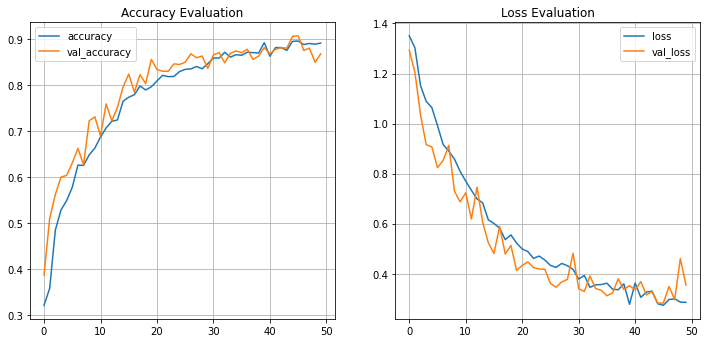

In [29]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("brain_tumor_model_history.jpg")

# Getting the accuracy for test set

In [32]:
test_accuracy = model.evaluate(test_generator)
print(test_accuracy)

1/1 [==============================] - 0s 60ms/step - loss: 0.3372 - accuracy: 0.6667
[0.33723393082618713, 0.6666666865348816]


In [33]:
preds = model.predict(test_generator, verbose=1)
preds

1/1 [==============================] - 0s 59ms/step


array([[9.9479663e-01, 9.9675405e-01, 2.8886421e-05, 9.4306612e-01],
       [5.4127699e-01, 9.9552000e-01, 7.5734556e-03, 1.8664750e-01],
       [1.9093215e-01, 7.2915959e-01, 1.2246409e-01, 9.9517667e-01]],
      dtype=float32)

In [34]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 1
predictions[predictions > 0.5] = 0

In [35]:
print(predictions)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
